# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

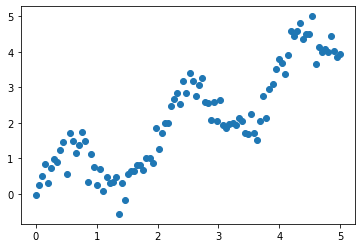

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5303772648606961


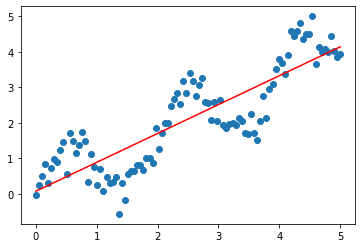

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

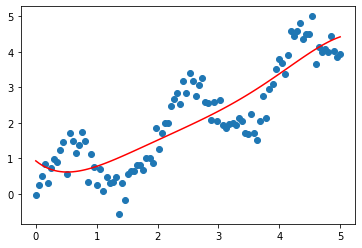

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.38355605  1.85943736 -0.77254147  0.15337356 -0.01131786]
interception:  0.93022365562795


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.93022366, 0.86499154, 0.80866209, 0.76067355, 0.72048718,
       0.6875869 , 0.66147874, 0.64169049, 0.6277712 , 0.61929074,
       0.61583936, 0.61702724, 0.62248407, 0.63185856, 0.64481801,
       0.66104787, 0.68025131, 0.70214874, 0.72647738, 0.75299081,
       0.78145854, 0.81166553, 0.84341179, 0.87651188, 0.9107945 ,
       0.94610206, 0.98229016, 1.01922725, 1.05679407, 1.0948833 ,
       1.13339906, 1.17225647, 1.21138122, 1.25070912, 1.29018563,
       1.32976545, 1.36941205, 1.40909722, 1.44880065, 1.48850946,
       1.52821775, 1.56792618, 1.6076415 , 1.64737611, 1.68714762,
       1.7269784 , 1.76689514, 1.80692837, 1.84711206, 1.88748317,
       1.92808115, 1.96894755, 2.01012557, 2.05165958, 2.0935947 ,
       2.13597633, 2.17884974, 2.2222596 , 2.26624954, 2.31086168,
       2.35613624, 2.40211102, 2.44882102, 2.49629795, 2.54456982,
       2.59366045, 2.64358906, 2.69436981, 2.74601134, 2.79851637,
       2.85188118, 2.90609524, 2.96114071, 3.01699203, 3.07361

In [18]:
predict_Y = regr_poly.predict(X_poly)
predict_Y

array([0.93022366, 0.86499154, 0.80866209, 0.76067355, 0.72048718,
       0.6875869 , 0.66147874, 0.64169049, 0.6277712 , 0.61929074,
       0.61583936, 0.61702724, 0.62248407, 0.63185856, 0.64481801,
       0.66104787, 0.68025131, 0.70214874, 0.72647738, 0.75299081,
       0.78145854, 0.81166553, 0.84341179, 0.87651188, 0.9107945 ,
       0.94610206, 0.98229016, 1.01922725, 1.05679407, 1.0948833 ,
       1.13339906, 1.17225647, 1.21138122, 1.25070912, 1.29018563,
       1.32976545, 1.36941205, 1.40909722, 1.44880065, 1.48850946,
       1.52821775, 1.56792618, 1.6076415 , 1.64737611, 1.68714762,
       1.7269784 , 1.76689514, 1.80692837, 1.84711206, 1.88748317,
       1.92808115, 1.96894755, 2.01012557, 2.05165958, 2.0935947 ,
       2.13597633, 2.17884974, 2.2222596 , 2.26624954, 2.31086168,
       2.35613624, 2.40211102, 2.44882102, 2.49629795, 2.54456982,
       2.59366045, 2.64358906, 2.69436981, 2.74601134, 2.79851637,
       2.85188118, 2.90609524, 2.96114071, 3.01699203, 3.07361

In [21]:
mse = np.sum((predict_Y - y)**2)/len(y)
mse

0.4764255379481031

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [23]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [24]:
sigma = 0.3

In [25]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

X_rbf

array([[2.49352209e-01, 3.72665317e-06, 8.32396968e-16, 2.77873902e-30,
        1.38634329e-49],
       [3.25472872e-01, 8.52574586e-06, 3.33776477e-15, 1.95292168e-29,
        1.70773187e-48],
       [4.12959721e-01, 1.89599467e-05, 1.30098499e-14, 1.33417628e-28,
        2.04484269e-47],
       [5.09321387e-01, 4.09857759e-05, 4.92924229e-14, 8.85998378e-28,
        2.38007940e-46],
       [6.10614979e-01, 8.61232743e-05, 1.81542941e-13, 5.71931425e-27,
        2.69286330e-45],
       [7.11597342e-01, 1.75913523e-04, 6.49934950e-13, 3.58877569e-26,
        2.96161426e-44],
       [8.06106646e-01, 3.49276399e-04, 2.26178717e-12, 2.18897091e-25,
        3.16616832e-43],
       [8.87650512e-01, 6.74109702e-04, 7.65111808e-12, 1.29785145e-24,
        3.29026462e-42],
       [9.50129573e-01, 1.26468753e-03, 2.51587693e-11, 7.47999499e-24,
        3.32367827e-41],
       [9.88587205e-01, 2.30636063e-03, 8.04165068e-11, 4.19052994e-23,
        3.26361145e-40],
       [9.99858301e-01, 4.0884

In [22]:
regr_rbf = LinearRegression()

In [23]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

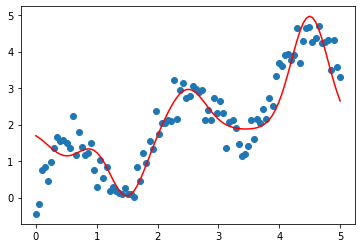

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [26]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

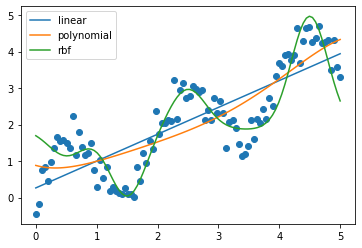

In [27]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [28]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6099512206136817


In [29]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5531666918302569


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28356996943295043
